<a href="https://colab.research.google.com/github/yesalgado/Archivos_CSV/blob/main/Cuadernos_de_trabajo/UNI_Tarea_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

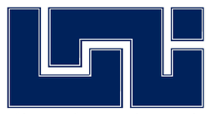

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)


Tellez Salgado, Yesner Alexander

~~~Python
Apellidos, y Nombres
~~~

# **Tarea Modelo no Supervisado**

## **Clustering**



##Activando las librerías necesarias
Para las alertas

In [1]:
import warnings

##Para el análisis de datos y el conjunto de datos

In [2]:
import numpy as np
import pandas as pd

##Para el preprocesado y el modelo

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

##Para gráficos

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt

#Conjunto de datos

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

https://www.kaggle.com/kandij/mall-customers


###Obtención de los datos

In [5]:
url = "https://raw.githubusercontent.com/yesalgado/Archivos_CSV/main/"

In [6]:
archivo = "Mall_Customers.csv"

In [7]:
Customer = url+archivo #los datos están separados por comas

Creación del df

In [8]:
Customers =  pd.read_csv(Customer)

Información del df

In [9]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


La data se encuentra limpia, sin datos nulos.

In [10]:
Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Visualización de las variables

In [11]:
fig = px.scatter(Customers,'Spending Score (1-100)','Annual Income (k$)',
                 template = "gridon")
fig.show()

#Generando el modelo

##Primer análisis de clustering - KMeans
Algoritmo

In [12]:
kmeans = KMeans(random_state=42)

Datos

In [13]:
X = Customers[['Spending Score (1-100)','Annual Income (k$)']]

Entrenamiento

In [14]:
kmeans.fit(X)

KMeans(random_state=42)

Predicción

In [15]:
y_preds = kmeans.predict(X)
y_preds

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6], dtype=int32)

Adjuntando la predicción al dataframe

In [16]:
Customers['cluster'] = y_preds
Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


In [17]:
fig = px.scatter(Customers,'Spending Score (1-100)','Annual Income (k$)',          
                 color = "cluster",
                 template = "gridon")
fig.show()

In [18]:
Customers.pivot_table(values=['Spending Score (1-100)','Annual Income (k$)'],
                index='cluster', aggfunc=np.mean)

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,25.095238,80.047619
1,63.952381,46.214286
2,47.659091,51.613636
3,80.181818,12.681818
4,80.375000,82.937500
5,25.727273,20.227273
6,114.714286,78.428571
7,109.700000,22.000000


En este resumen, podemos ver que el algoritmo ha agrupado los datos en ocho grupos (grupos 0 a 7). El grupo 0 tiene los montos de ingresos anuales y puntaje del cliente promedio más bajo entre todos los grupos, mientras que el grupo 2 y el grupo 7 tiene los valores más altos. Con esta tabla dinámica, podemos comparar clústeres entre ellos utilizando sus valores resumidos.

In [19]:
fig = px.scatter(Customers,'Spending Score (1-100)','Annual Income (k$)',          
                 color = "cluster",
                 template = "gridon")
fig.show()

# **Conclusiones**


Ahora podemos ver fácilmente cuáles son los grupos en este gráfico y cómo se diferencian entre sí. Podemos ver claramente que k-means asignó puntos de datos a cada grupo principalmente en función de la variable del eje x, que es Spending Score. Los límites de los grupos son líneas rectas verticales

#PyCaret - K-means

##Instalando PyCaret

In [20]:
!pip install pycaret

###Habilitando Google Colab y módulos necesarios


In [21]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


##Para el tratamiento de los datos

In [22]:
import pandas as pd
import numpy as np

In [23]:
Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


In [24]:
Customers = Customers.drop(columns=["CustomerID","Genre","Age","cluster"]) #se eliminan las variables no relevantes para este problema
Customers.head(3) #vista del dataframe

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [25]:
Customers.shape

(200, 2)

##Dividiendo el conjunto de datos

In [26]:
Customers = Customers.sample(frac=0.75, random_state=0)
Customers_no_vistos = Customers.drop(Customers.index)

In [27]:
Customers.reset_index(inplace=True, drop=True)
Customers_no_vistos.reset_index(inplace=True, drop=True)

In [28]:
print("Datos para Modelar: " + str(Customers.shape))
print("Datos no vistos para Predicciones: " + str(Customers_no_vistos.shape))

Datos para Modelar: (150, 2)
Datos no vistos para Predicciones: (0, 2)


In [29]:
Customers.head()

,Annual Income (k$),Spending Score (1-100)
0,23,29
1,87,13
2,63,46
3,61,42
4,88,69


In [30]:
Customers_no_vistos.head()

,Annual Income (k$),Spending Score (1-100)


#Configuración del entorno en PyCaret

In [31]:
from pycaret.clustering import *

In [32]:
agrupacion = setup(Customers, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(150, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 2)"
9,CPU Jobs,-1


##Creación del Modelo

In [33]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [34]:
km = create_model('kmeans', num_clusters=8)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4607,195.1953,0.7427,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


##Asignando el Modelo

In [35]:
km_resultados = assign_model(km)
km_resultados.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,23,29,Cluster 3
1,87,13,Cluster 2
2,63,46,Cluster 7
3,61,42,Cluster 7
4,88,69,Cluster 6


In [36]:
km_resultados.shape

(150, 3)

##Visualización del Modelo

##Visualización de los clusters

In [37]:
plot_model(km)

##Visualización del Codo

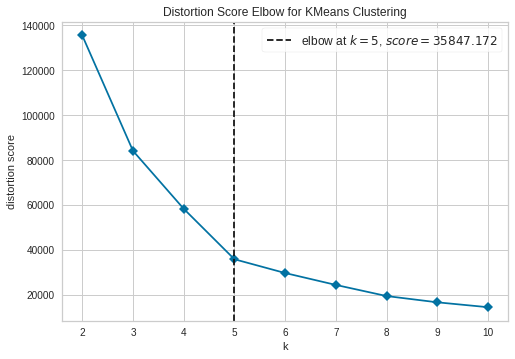

In [38]:
plot_model(km, plot = 'elbow')

##Visualización de la Silueta

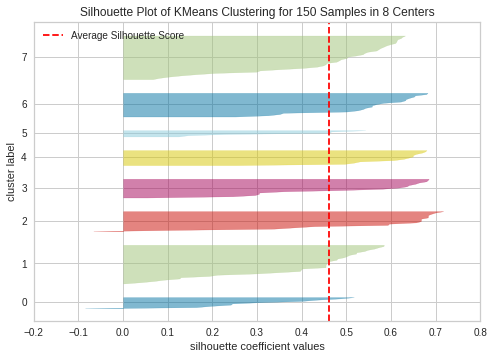

In [39]:
plot_model(km, plot = 'silhouette')

##Visualización de la Distribución

In [40]:
plot_model(km, plot = 'distribution')

In [41]:
plot_model(km, plot = 'distribution', feature = 'Spending Score (1-100)')

In [42]:
plot_model(km, plot = 'distribution', feature = 'Annual Income (k$)')

#Guardando el modelo

In [43]:
save_model(km,"/modelo_km_PyCaret")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

##Accediendo al modelo guardado

In [44]:
saved_km = load_model("/modelo_km_PyCaret")

Transformation Pipeline and Model Successfully Loaded
